# Titanic
## Background of the project
"Titanic" is a 1997 American epic romance and disaster film directed, written, produced, and co-edited by James Cameron. The plot centers on the fictional RMS Titanic, a British passenger liner, which sinks in the North Atlantic Ocean after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. The movie stars Kate Winslet and Leonardo DiCaprio as members of different social classes who fall in love aboard the ship during its ill-fated maiden voyage. The film also features Billy Zane, Kathy Bates, Frances Fisher, Gloria Stuart, Bernard Hill, Jonathan Hyde, Victor Garber, and Bill Paxton.

In order to relfect the realities of early 1900s cruise across the Atlantic, James Cameron compiled a now-famous data set of 2224 passengers and crew. He then assument that there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 people.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. The goal of this notebook it to try asses the factors that migth have lead to survival and to allow to predict the fate of each passenger.

## Goals for the project
Jokes aside, this project is meant to be a training in:
- Techniques for binary prediction
- Kaggle
- Jupyter Notebooks in Visual Studio Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style = "dark")

In [3]:
titanic_df = pd.read_csv("titanic.csv")

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
n_total = len(titanic_df)
n_survivors = sum(titanic_df.Survived == 1)
n_casualties = sum(titanic_df.Survived == 0)

In [15]:
print("Out of {} passengers {} ({:.0%}) survived, and {} ({:.0%}) died."
      .format(n_total, n_survivors, n_survivors / n_total, n_casualties, n_casualties / n_total)
      )

Out of 891 passengers 342 (38%) survived, and 549 (62%) died.


<Axes: xlabel='Pclass', ylabel='count'>

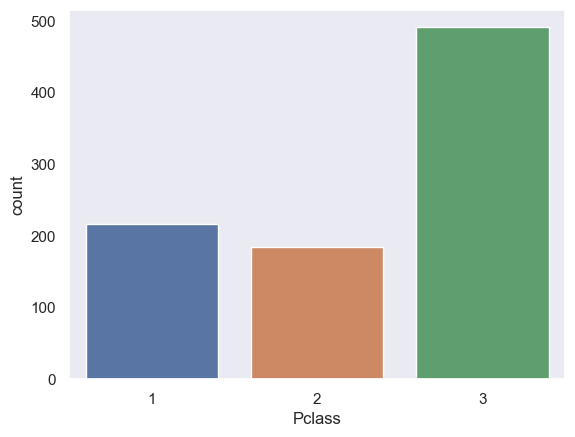

In [10]:
sns.countplot(x = "Pclass", data = titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

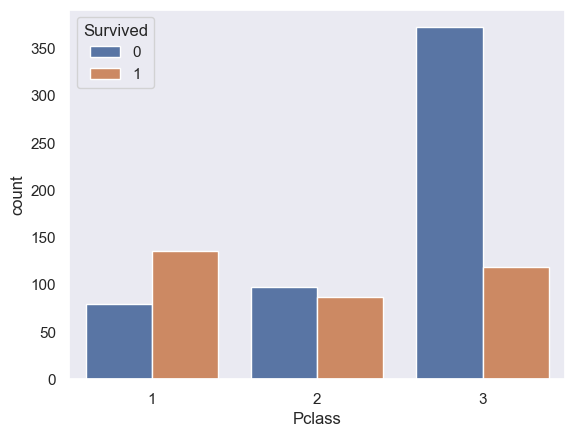

In [11]:
sns.countplot(x = "Pclass", hue = "Survived", data = titanic_df)

<Axes: xlabel='SibSp', ylabel='count'>

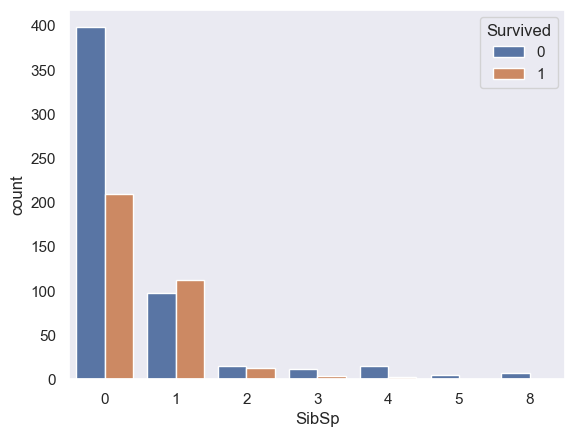

In [12]:
sns.countplot(x = "SibSp", hue = "Survived", data = titanic_df)

<Axes: xlabel='Parch', ylabel='count'>

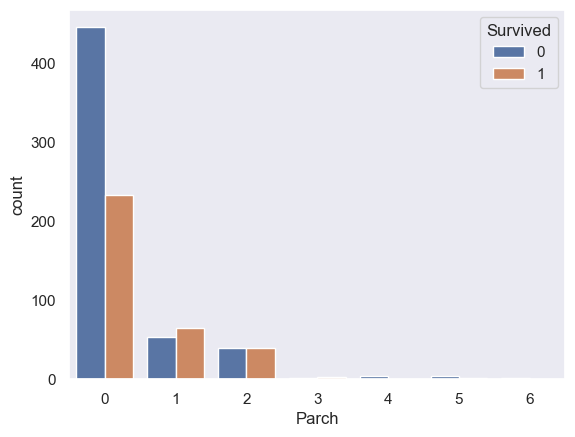

In [13]:
sns.countplot(x = "Parch", hue = "Survived", data = titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

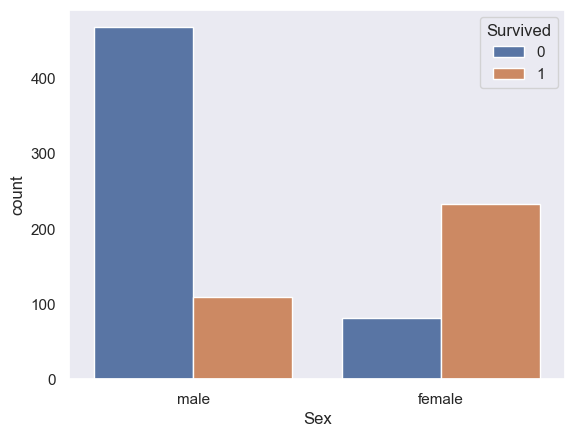

In [14]:
sns.countplot(x = "Sex", hue = "Survived", data = titanic_df)

<Axes: >

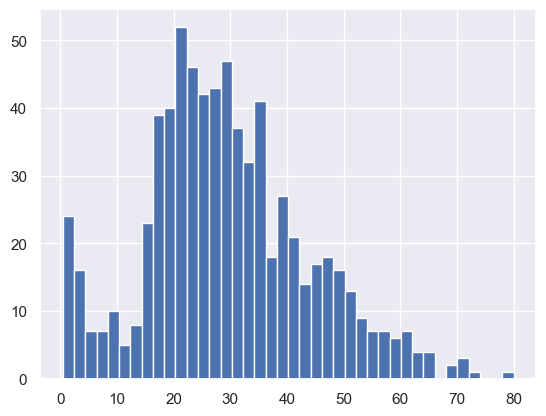

In [15]:
titanic_df["Age"].hist(bins = 40)

<Axes: >

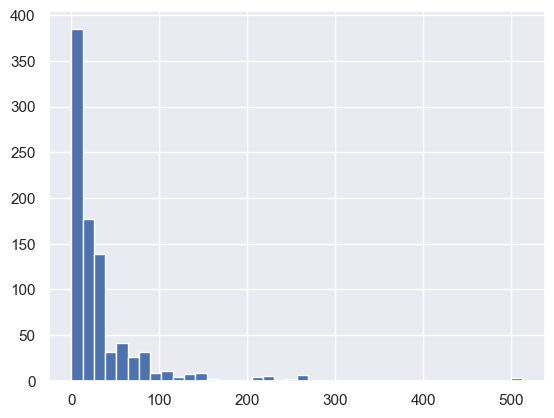

In [16]:
titanic_df["Fare"].hist(bins = 40)

<Axes: >

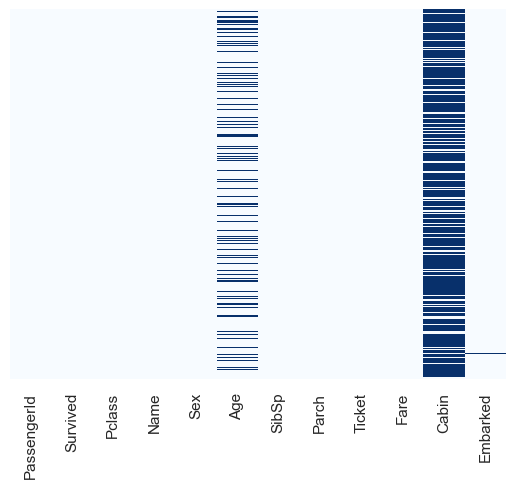

In [17]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [18]:
titanic_df.drop("Cabin", axis = 1, inplace = True)

In [19]:
titanic_df.drop(["Name", "Ticket", "Embarked", "PassengerId"], axis = 1, inplace = True)

<Axes: >

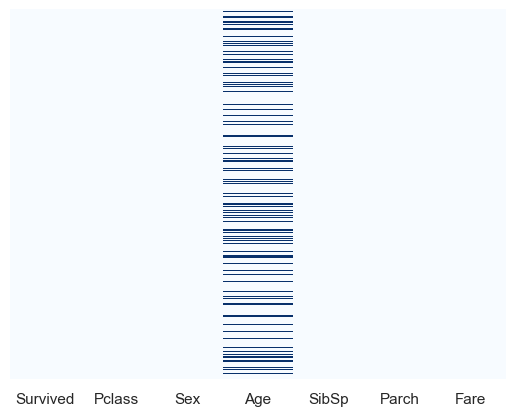

In [20]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

<Axes: xlabel='Sex', ylabel='Age'>

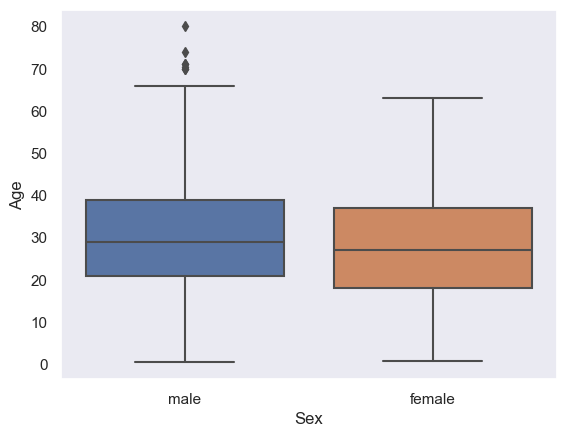

In [21]:
sns.boxplot(x = "Sex", y = "Age", data = titanic_df)

In [22]:
def fillAge(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex == "male":
            return 29
        else:
            return 25
    else:
        return age

In [23]:
titanic_df["Age"] = titanic_df[["Age", "Sex"]].apply(fillAge, axis = 1)

<Axes: >

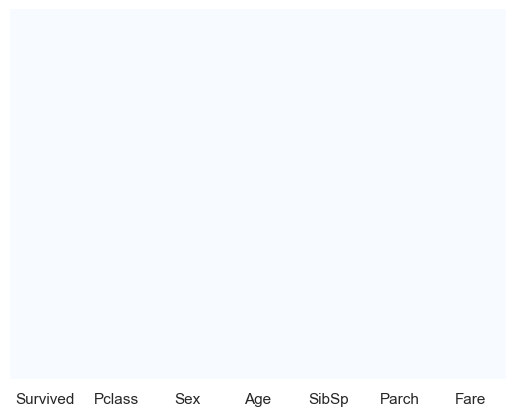

In [24]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [25]:
pd.get_dummies(titanic_df["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [26]:
male = pd.get_dummies(titanic_df["Sex"], drop_first = True)

In [27]:
titanic_df.drop("Sex", axis = 1, inplace = True)
titanic_df = pd.concat([titanic_df, male], axis = 1)
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [28]:
X = titanic_df.drop("Survived", axis = 1).values
y = titanic_df["Survived"].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [31]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

<Axes: >

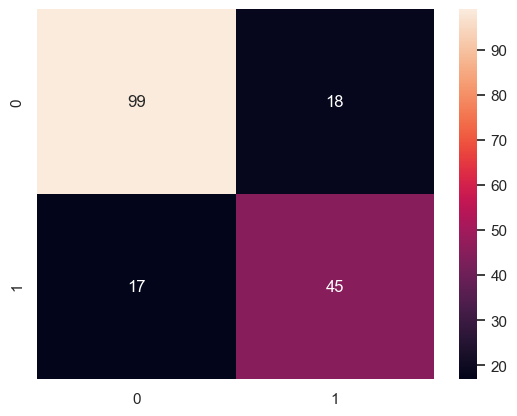

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



In [34]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

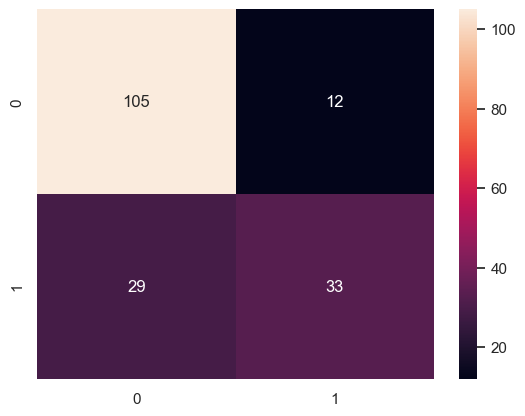

In [35]:
y_predict_test = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

In [36]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       117
           1       0.73      0.53      0.62        62

    accuracy                           0.77       179
   macro avg       0.76      0.71      0.73       179
weighted avg       0.77      0.77      0.76       179



              precision    recall  f1-score   support

           0       0.87      0.86      0.87       117
           1       0.75      0.76      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



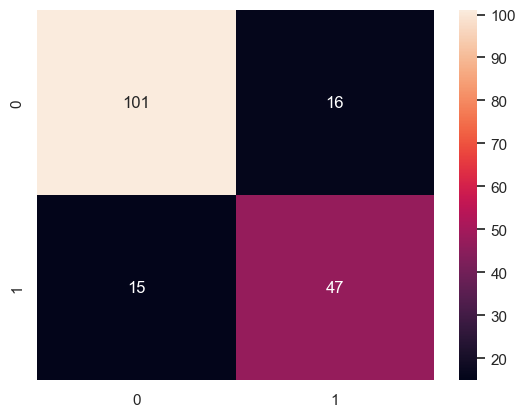

In [44]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
y_predict_test = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

print(classification_report(y_test, y_predict_test))